In [17]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tqdm.pandas()

In [2]:
df = pd.read_csv('../dataset/cluster/2020-02-road1-in-5cluster.csv',parse_dates=["datetime"])
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,cluster
0,2020-02-01 00:00:34,1,19,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1
1,2020-02-01 00:00:34,1,26,in,1,0,0,1,71,71,0,0,0.000000,0.000000,0.8875,0
2,2020-02-01 00:00:34,1,28,in,3,1,1,2,41,48,0,0,0.021739,0.022727,0.5125,2
3,2020-02-01 00:00:34,1,29,in,3,3,3,0,75,108,0,0,0.065217,0.068182,0.9375,0
4,2020-02-01 00:00:34,1,30,in,5,5,3,0,32,56,62,66,0.108696,0.068182,0.4000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694507,2020-02-29 23:59:14,1,939,in,1,0,0,1,20,20,0,0,0.000000,0.000000,0.2500,2
22694508,2020-02-29 23:59:14,1,941,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1
22694509,2020-02-29 23:59:14,1,959,in,1,1,0,0,47,47,60,60,0.021739,0.000000,0.5875,4
22694510,2020-02-29 23:59:14,1,960,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1


In [5]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster'],axis=1)
corr = df_corr.corr()

<AxesSubplot:>

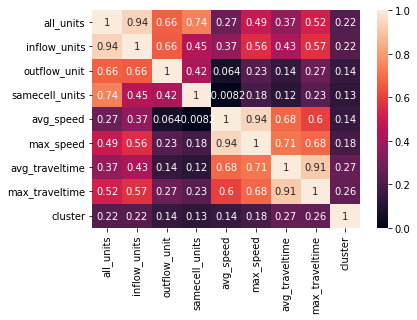

In [7]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [9]:
d_cols = ['all_units','inflow_units','avg_traveltime','max_traveltime']

In [10]:
x = df[d_cols]
y = df['cluster']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [18]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = tree.predict(x_test)

In [20]:
y_test.value_counts()

1    2165092
4    2108711
0    1946079
2     745093
3     524214
Name: cluster, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test, y_pred))

0.6335216002694016
